# Classificador machine learning - Naive bayes EMAIL SPAM

![](https://img.freepik.com/free-vector/spam-isometric-landing-page-with-letter-envelopes-laptop-screen-electronic-email-service-messages-as-part-business-marketing-hacker-attack-webmail-malware-concept-3d-vector-web-banner_107791-10858.jpg?w=1380&t=st=1689130777~exp=1689131377~hmac=01044e343714eaa4d9a977784bbc573881f068a1bae942663461e2a557a43b89)

## Implementando um Classificador de Spam com Naive Bayes

O objetivo deste projeto é construir um classificador de Spamusandooalgoritmo de classificação Naive Bayes. Construiremos esse algoritmo a partir dozero sem usar bibliotecas, o que será muito útil para construção de aplicaçõesanalíticas. O modelo de documento que usaremos aqui é um modelo de sacodepalavras (bag of words). Usaremos dois tipos de modelo bag of words:

A.Com base na presença de palavra (se uma palavra aparece no documentoou não, o que tornará os atributos de entrada binários)

B.Com base na frequência de palavras (frequência de ocorrência depalavrano documento, o que tornará os atributos de entrada contínuos)

## Modelo Bag of Words
Um saco de palavras (bag of words) é uma representação de umtextocomo um agrupamento de palavras, sem qualquer consideração da sua estruturagramatical ou da ordem das palavras. É simplesmente umhistograma sobreaspalavras da língua, e cada documento é representado como umvetor sobreestaspalavras. As entradas neste vetor simplesmente correspondemà presençaouàausência da palavra correspondente (quando se utiliza o tipo A acima ouafrequência da ocorrência da palavra quando se usa o caso B acima).

**Objetivo negocio**: Criar modelo machine learning com modelo Naive bayes no fim classificar como spam ou real.


**Base dados: https://www.kaggle.com/datasets/team-ai/spam-text-message-classification**

In [71]:
# Importação das bibliotecas 

# Bibliotecas sistema
import re
import unicodedata
import itertools

# Biblioteca para manipulação de arquivos
import pandas as pd
import numpy as np 
from numpy.linalg import lstsq
from numpy.random import randn, seed

# Bibliotecas machine learning
import sklearn
from matplotlib import pyplot as plt

# Bibliotecas bigdata
import pyspark
import pyspark as pk
from pyspark.sql import functions as func
from pyspark.sql.types import StringType,FloatType

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import wordcloud
from wordcloud import WordCloud

# NLTK para NLP
import nltk
import re
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Baixando todos os complementos NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download("stopwords")
nltk.download('punkt')
wordnet_lemmatizer = WordNetLemmatizer()

# Carregar as versões das bibliotecas
import watermark

# Versões das bibliotecas
%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

# Configuração para os gráficos largura e layout dos graficos
plt.style.use('fivethirtyeight')

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

# Versão do python
from platform import python_version
print('Versão python neste Jupyter Notebook:', python_version())

Author: Versões das bibliotecas

matplotlib: 3.7.1
wordcloud : 1.9.2
watermark : 2.4.2
numpy     : 1.24.3
pyspark   : 3.4.1
re        : 2.2.1
seaborn   : 0.12.2
pandas    : 2.0.3
plotly    : 5.9.0
nltk      : 3.7
sklearn   : 0.0.post5

Versão python neste Jupyter Notebook: 3.9.13


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Parte 1 - Base dados

In [72]:
data = pd.read_csv("SPAM text message 20170820 - Data.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [73]:
# Exibido 5 primeiros dados
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
# Exibido 5 últimos dados 
data.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [75]:
# Número de linhas e colunas
data.shape

(5572, 2)

In [6]:
# Exibido tipos de dados
data.dtypes

Category    object
Message     object
dtype: object

In [7]:
# Verificando informações das variaveis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
# Total de colunas e linhas 
print("Números de linhas: {}" .format(data.shape[0]))
print("Números de colunas: {}" .format(data.shape[1]))

Números de linhas: 5572
Números de colunas: 2


In [9]:
data["Category"].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [10]:
data["Message"].value_counts()

Message
Sorry, I'll call later                                                                                                                                      30
I cant pick the phone right now. Pls send a message                                                                                                         12
Ok...                                                                                                                                                       10
Ok                                                                                                                                                           4
Ok.                                                                                                                                                          4
                                                                                                                                                            ..
I gotta collect da car at 6 lei.      

In [11]:
# Exibindo valores ausentes e valores únicos
print("\nMissing values\n", data.isnull().sum().values.sum())
print("\nUnique values\n",data.nunique())

# Verificando dados ausentes
data.isna().sum()

# Dados duplicados
data.duplicated().sum()


Missing values
 0

Unique values
 Category       2
Message     5157
dtype: int64


415

## 2.0 Pré-processamento de dados

Pré-processamento é uma etapa crucial no processamento de dados, incluindo o processamento de linguagem natural (NLP). É um conjunto de técnicas e procedimentos aplicados aos dados brutos com o objetivo de prepará-los para uma análise mais eficiente e precisa.
No contexto do processamento de linguagem natural, o pré-processamento refere-se ao conjunto de transformações aplicadas ao texto antes de ser utilizado em algoritmos ou modelos de aprendizado de máquina. Essas transformações visam limpar, normalizar e estruturar o texto, removendo informações desnecessárias, padronizando formatos e preparando os dados para uma análise mais significativa.

In [12]:
# Mundando os tipo de dados de object para string 

data['Category'] = data['Category'].astype(str)
data['Message'] = data['Message'].astype(str)

In [13]:
# Variável para treino
x = data["Message"]

# Lista de stopwords
list_stop_words = ['covfefe']

In [14]:
%%time

from tqdm import tqdm

# Pré - processamento
# Recebe uma lista de palavras ou texto como entrada e retorna um conjunto de palavras mais limpo. 
# A função faz normalização, codificação/decodificação, letras minúsculas e lematização.
def limpeza(texto):
    WNL = nltk.stem.WordNetLemmatizer()
    stop_words2 = nltk.corpus.stopwords.words("english") + stopwords
    texto = (unicodedata.normalize("NFKD", texto).encode("ascii", "ignore").decode("utf-8", "ignore").lower())
    WORDS = re.sub(r'[^\w\s]', '', texto).split()
    return [WNL.lemmatize(word) for word in WORDS if word not in stop_words2]

# Remove stop words: Removendo as stop words na base de dados
def remove_stop_words(instancia): # Removendo as stop words
    stopwords = set(nltk.corpus.stopwords.words("english"))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# Palavras derivacionalmente relacionadas com significados semelhantes, palavras para retornar documentos que contenham outra palavra no conjunto.
def text_stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
        return (" ".join(palavras))

# Limpeza na base de dados limpando dados de web com http e outros.
def dados_limpos(instancia): 
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

#Lemmatization: Em linguística é o processo de agrupar as formas flexionadas de uma palavra para que possam ser analisadas como um único item, identificado pelo lema da palavra , ou forma de dicionário.
def Lemmatization(instancia):
    palavras = []
    for w in instancia.split():
        palavras.append(wordnet_lemmatizer.lemmatize(w))
        return (" ".join(palavras))

# Preprocessing: Pré - processamento da base de dados que serão ser para análise de dados.
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','')
    stopwords = set(nltk.corpus.stopwords.words('english'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# remover caracteres alphanuméricos
alphanumeric = lambda x: re.sub('\w*\d\w*', '', x)

# remover pontuações
punc = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)

# remover espaços duplos
remove_space = lambda x: x.replace('  ', ' ')

# Removendo pontuações descrições itens com expressão regular
data['Message'] = data['Message'].str.replace('[,.:;!?]+', ' ', regex=True).copy()

# Removendo os caracteres especiais de descrições 
data['Message'] = data['Message'].str.replace ('[/<>()|\+\-\$%&#@\'\"]+', ' ', regex=True).copy()

# Removendo palavras com números 
data['Message'] = data['Message'].str.replace('[0-9]+', '', regex=True).copy()

# Stopwords
# lista de 50 primeiras do stop words junto com a biblioteca NLTK
stop_words = str(stopwords.words('english'))

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 
 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 
 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 
 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 
 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 
 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'ok']

# Criando objeto do tipo lista com stop words
stopwords = ['em','sao','ao',"ok",'de','da','do','para','c','kg','un',
              'ml','pct','und','das','no','ou','pc','gr','pt','cm',
              'vd','com','sem','gfa','jg','la','1','2','3','4','5',
              '6','7','8','9','0','a','b','c','d','e','lt','f','g',
              'h','i','j','k','l','m','n','o','p','q','r','s','t',
              'u','v','x','w','y','z']

# Gerando a base dados limpo
x = [Preprocessing(i) for i in x]

# Aplicando nova coluna
data["Text_clean"] = data["Message"].apply(Preprocessing)

# Mundando os tipo de dados de object para string 
data["Text_clean"] = data["Text_clean"].astype(str)

# Salvando base textos
# Salvando arquivo em csv
data.to_csv("Text_clean.csv", index=False)

# Salvando arquivo em text
data.to_csv("Text_clean.text", index=False)

# Carregando os dados
for i in tqdm(range(100)):
    x

# Visualizando os dados 
data.Text_clean 

100%|████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 99109.26it/s]

CPU times: total: 219 ms
Wall time: 1.27 s


0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    nd time tried contact u u £ pound prize claim ...
5568                          ü b going esplanade fr home
5569                              pity * mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Text_clean, Length: 5572, dtype: object

## 3.0 Processamento linguagem natural - N-Gramas
Os n-gramas são conjuntos de tokens em que cada token contém apenas uma palavra. Vejamos um exemplo de lista de tokens unigramas para a seguinte frase:

"Deus é bom o tempo todo" — — {"deus", "bom", "tempo", "todo"}

Neste caso, por minha escolha pessoal e geralmente por ser feito dessa forma, não foram consideradas palavras com apenas um caractere. Além disso, proibi o uso de acentos e todas as palavras estão em minúsculas.

Para analisar e limpar o texto, podemos utilizar a biblioteca NLTK com expressões regulares (regex). Também podemos especificar palavras adicionais que desejamos ignorar, conhecidas como palavras de parada (stop words).

In [15]:
%%time

# Visualizando os N-Grams os top 30
WORDS = limpeza("".join(str(data["Text_clean"].tolist())))
WORDS[:30]

CPU times: total: 250 ms
Wall time: 1.09 s


['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'great',
 'world',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'lar',
 'joking',
 'wif',
 'oni',
 'free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'st',
 'may',
 'text',
 'fa']

In [16]:
%%time

# Visualizando os bigramas que ocorre mais nessa amostra
NG = (pd.Series(nltk.ngrams(WORDS, 2)).value_counts())[:30]
NG

CPU times: total: 0 ns
Wall time: 29.1 ms


(please, call)         56
(call, later)          52
(co, uk)               49
(let, know)            42
(take, care)           40
(sorry, call)          38
(good, morning)        33
(po, box)              32
(new, year)            32
(customer, service)    29
(call, landline)       25
(decimal, gt)          23
(guaranteed, call)     23
(pls, send)            22
(prize, guaranteed)    22
(every, week)          21
(gt, min)              21
(send, stop)           21
(free, call)           21
(national, rate)       20
(good, night)          20
(await, collection)    19
(happy, new)           19
(last, night)          19
(hi, hi)               19
(free, text)           19
(chance, win)          19
(selected, receive)    19
(urgent, mobile)       18
(call, land)           18
Name: count, dtype: int64

In [17]:
%%time

# Visualizando os 10 principais trigramas
NB_T = (pd.Series(nltk.ngrams(WORDS, 3)).value_counts())[:10]
NB_T

CPU times: total: 15.6 ms
Wall time: 22.7 ms


(sorry, call, later)             38
(prize, guaranteed, call)        21
(happy, new, year)               19
(call, land, line)               18
(private, account, statement)    16
(call, identifier, code)         16
(suite, land, row)               15
(guaranteed, call, land)         15
(land, row, wjhl)                15
(call, customer, service)        15
Name: count, dtype: int64

# 3.1 Visualização de Trigramas e Bigramas

**Bigramas**

Os bigramas são tokens compostos por duas palavras em cada token, sendo a segunda palavra sempre a sequência da primeira.

A partir dos bigramas, podemos construir trigramas e quantos n-gramas desejarmos, mas geralmente é comum utilizar apenas até "3-gramas".

Exemplo de lista de tokens com bigramas para a seguinte frase:

"Deus é bom o tempo todo" — — {"deus bom", "bom tempo", "tempo todo"}

Tokenização com Unigramas e Bigramas

Ao realizar a tokenização com unigramas e bigramas na frase "Deus é bom o tempo todo", obtemos os seguintes tokens:

{"deus", "bom", "tempo", "todo", "deus bom", "bom tempo", "tempo todo"}

O número de n-gramas, ou seja, o número de tokens, pode fazer diferença dependendo do caso, mas geralmente não é significativo e varia de acordo com a situação específica.

In [18]:
%%time
bigrams = (pd.Series(nltk.ngrams(WORDS, 2)).value_counts())[:12]
trigrams = (pd.Series(nltk.trigrams(WORDS)).value_counts())[:20]
bigrams

CPU times: total: 0 ns
Wall time: 41.2 ms


(please, call)         56
(call, later)          52
(co, uk)               49
(let, know)            42
(take, care)           40
(sorry, call)          38
(good, morning)        33
(po, box)              32
(new, year)            32
(customer, service)    29
(call, landline)       25
(decimal, gt)          23
Name: count, dtype: int64

# 3.2 Tokenização das palavras

- A tokenização das palavras precisam ser codificadas como inteiros. Ou valores de ponto flutuante para serem usados como entradas para modelos machine learning.

- É basicamente dividir algum texto em tokens, esses tokens podem ser palavras, então se um texto tem 10 palavras, possivelmente (depende da metodologia) terá 10 tokens. 

- Também pode ser dividido por letras ou conjunto de palavras. A metodologia fica a critério de quem fará os tokens.

# Tokenization

Tokenização é o processo de dividir um texto em unidades menores chamadas tokens. Esses tokens podem ser palavras individuais, frases, símbolos ou qualquer outra unidade significativa, dependendo do contexto e dos requisitos da análise.
A tokenização é uma etapa fundamental no processamento de linguagem natural (NLP) e serve como base para várias tarefas, como classificação de texto, análise de sentimento, tradução automática, entre outras. Ao dividir o texto em tokens, torna-se possível analisar e extrair informações de forma mais granular e eficiente.

In [19]:
%%time
# Importando biblioteca tokenize
from nltk import tokenize

# Texto para treino
texto = "free entry wkly comp win fa cup final"

# Criando uma instância do tokenizer
tokenize_text = tokenize.WhitespaceTokenizer()
tokenize = tokenize_text.tokenize(texto)
tokenize

CPU times: total: 0 ns
Wall time: 0 ns


['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final']

In [20]:
%%time
# Importando biblioteca tokenize, word tokenize
from nltk.tokenize import sent_tokenize, word_tokenize

# Tokenização das palavra da coluna - sent tokenize
tokenize_sent_tokenize = sent_tokenize(data["Text_clean"][1])

# Tokenização das palavras da coluna com word tokenize
tokenize_word_tokenize = word_tokenize(data["Text_clean"][3])
tokenize_sent_tokenize

CPU times: total: 0 ns
Wall time: 5.99 ms


['ok lar joking wif u oni']

In [21]:
%%time

palavras = data["Text_clean"]
token_texto_data = data["Text_clean"]

#token_texto_data = tokenize_text.tokenize(palavras)
token_texto_freq = nltk.FreqDist(token_texto_data)

df_token_texto_freq = pd.DataFrame({"Palavras": list(token_texto_freq.keys()),
                                   "Frequência": list(token_texto_freq.values())})

# Criando um data_frame palavras mais faladas
df_palavras = df_token_texto_freq.nlargest(columns = "Frequência", n=2)

# Imprimindo 50 palavras mais falada
print(df_token_texto_freq.head(50))

################## Salvando tokenização textos
# Salvando arquivo em csv
df_token_texto_freq.to_csv("tokenizacao_total.csv")

################## Salvando arquivo text
df_token_texto_freq.to_csv("tokenizacao_total.text")

df_token_texto_freq.head(15)

                                             Palavras  Frequência
0   go jurong point crazy available bugis n great ...           1
1                             ok lar joking wif u oni           1
2   free entry wkly comp win fa cup final tkts st ...           2
3                 u dun say early hor u c already say           1
4              nah think goes usf lives around though           1
5   freemsg hey darling week word back like fun st...           1
6      even brother like speak treat like aids patent           1
7   per request melle melle oru minnaminunginte nu...           3
8   winner valued network customer selected receiv...           2
9   mobile months u r entitled update latest colou...           2
10  gonna home soon want talk stuff anymore tonigh...           1
11  six chances win cash pounds txt csh send cost ...           2
12  urgent week free membership £ prize jackpot tx...           2
13  searching right words thank breather promise w...           1
14        

,Palavras,Frequência
0,go jurong point crazy available bugis n great ...,1
1,ok lar joking wif u oni,1
2,free entry wkly comp win fa cup final tkts st ...,2
3,u dun say early hor u c already say,1
4,nah think goes usf lives around though,1
5,freemsg hey darling week word back like fun st...,1
6,even brother like speak treat like aids patent,1
7,per request melle melle oru minnaminunginte nu...,3
8,winner valued network customer selected receiv...,2
9,mobile months u r entitled update latest colou...,2


In [22]:
df_token_texto_freq.Frequência.sum()

5572

In [23]:
df_token_texto_freq.shape

(5068, 2)

## 3.3 Classificando os textos com sentimentos com Vader

A análise de sentimentos é uma tarefa importante na área de processamento de linguagem natural, que visa determinar a polaridade emocional de um texto. Uma maneira popular de realizar essa classificação é usando a biblioteca Vader. Vader (Valence Aware Dictionary and sEntiment Reasoner) é uma ferramenta específica para a análise de sentimentos em textos. Ela foi desenvolvida para lidar com as complexidades da linguagem natural e é capaz de atribuir pontuações de polaridade e intensidade a palavras e frases.

In [24]:
%%time

# Análise de sentimento nas frases

# Importando a biblioteca vader sentiment, sentiment intensity analyzer
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Modelo da análise de sentimento
model = SentimentIntensityAnalyzer()

# Função das frases
def data_model(df):
    
    # Modelo polaridade e score das frases
    model_set = model.polarity_scores(df) 
    
    # Print análise de sentimento
    print("{:-<40} {}".format(df, str(model_set)))

# Verificando sentimento
data_model("Today I was approved in the computer engineering course at college I am very happy") 

Today I was approved in the computer engineering course at college I am very happy {'neg': 0.0, 'neu': 0.618, 'pos': 0.382, 'compound': 0.7778}
CPU times: total: 0 ns
Wall time: 18.4 ms


In [25]:
%%time

x = 0

# Modelo
model_1 = []

# Lendo os dados do score
while(x<len(data)):
    
    # Modelo
    y = model.polarity_scores(data.iloc[x]['Text_clean'])
    
    # Armazenando no modelo
    model_1.append(y["compound"])
    x = x + 1
    
# Adicionando no array 
model_1 = np.array(model_1)

# Score do modelo
data["Score"] = model_1
data.head(8)

CPU times: total: 15.6 ms
Wall time: 697 ms


,Category,Message,Text_clean,Score
0,ham,Go until jurong point crazy Available only i...,go jurong point crazy available bugis n great ...,0.4019
1,ham,Ok lar Joking wif u oni,ok lar joking wif u oni,0.4767
2,spam,Free entry in a wkly comp to win FA Cup final...,free entry wkly comp win fa cup final tkts st ...,0.7964
3,ham,U dun say so early hor U c already then say,u dun say early hor u c already say,0.0000
4,ham,Nah I don t think he goes to usf he lives aro...,nah think goes usf lives around though,-0.1027
5,spam,FreeMsg Hey there darling it s been week s no...,freemsg hey darling week word back like fun st...,0.8957
6,ham,Even my brother is not like to speak with me ...,even brother like speak treat like aids patent,0.7717
7,ham,As per your request Melle Melle Oru Minnamin...,per request melle melle oru minnaminunginte nu...,0.4767


In [26]:
%%time

from nltk.sentiment import SentimentIntensityAnalyzer

# Criar uma instância do SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

# Aplicar o SentimentIntensityAnalyzer aos textos e classificar como positivo ou negativo

categories = []

for text in data['Text_clean']:
    sentiment = sent.polarity_scores(text)
    compound_score = sentiment['compound']
    if compound_score >= 0:
        categories.append('positive')
    else:
        categories.append('negative')

# Adicionar as categorias à base de dados
data['sentiment'] = categories

# Exibir a base de dados com as categorias de sentimentos
data

CPU times: total: 31.2 ms
Wall time: 411 ms


,Category,Message,Text_clean,Score,sentiment
0,ham,Go until jurong point crazy Available only i...,go jurong point crazy available bugis n great ...,0.4019,positive
1,ham,Ok lar Joking wif u oni,ok lar joking wif u oni,0.4767,positive
2,spam,Free entry in a wkly comp to win FA Cup final...,free entry wkly comp win fa cup final tkts st ...,0.7964,positive
3,ham,U dun say so early hor U c already then say,u dun say early hor u c already say,0.0000,positive
4,ham,Nah I don t think he goes to usf he lives aro...,nah think goes usf lives around though,-0.1027,negative
...,...,...,...,...,...
5567,spam,This is the nd time we have tried contact u ...,nd time tried contact u u £ pound prize claim ...,0.7351,positive
5568,ham,Will ü b going to esplanade fr home,ü b going esplanade fr home,0.0000,positive
5569,ham,Pity * was in mood for that So any other sug...,pity * mood suggestions,-0.2960,negative
5570,ham,The guy did some bitching but I acted like i d...,guy bitching acted like interested buying some...,0.7506,positive


In [27]:
# Salvando dataset limpo com os sentimentos classificados em um arquivo em csv
data.to_csv("dataset_sentimentos.csv")

In [28]:
# Visualizando os sentimentos
data.sentiment.value_counts()

sentiment
positive    4718
negative     854
Name: count, dtype: int64

In [29]:
# Verificando o total de sentimentos

data_sentimet = data.sentiment.value_counts().sort_values()
data_sentimet

sentiment
negative     854
positive    4718
Name: count, dtype: int64

# 4.0 Feature Engineering

Praticamente todos os algoritmos de Aprendizado de Máquina possuem entradas e saídas. As entradas são formadas por colunas de dados estruturados, onde cada coluna recebe o nome de feature, também conhecido como variáveis independentes ou atributos. Essas features podem ser palavras, pedaços de informação de uma imagem, etc. Os modelos de aprendizado de máquina utilizam esses recursos para classificar as informações.
Por exemplo, sedentarismo e fator hereditário são variáveis independentes para quando se quer prever se alguém vai ter câncer ou não

As saídas, por sua vez, são chamadas de variáveis dependentes ou classe, e essa é a variável que estamos tentando prever. O nosso resultado pode ser 0 e 1 correspondendo a 'Não' e 'Sim' respectivamente, que responde a uma pergunta como: "Fulano é bom pagador?" ou a probabilidade de alguém comprar um produto ou não.

In [30]:
# Adicionar as categorias à base de dados
data['sentiment'] = categories

# Verificar se há rótulos desconhecidos
unknown_labels = set(data['sentiment']) - {'positive', 'negative'}
if unknown_labels:
    print('Rótulos desconhecidos encontrados:', unknown_labels)
    # Realize as ações necessárias para lidar com os rótulos desconhecidos

# Exibir a base de dados com as categorias de sentimentos
data.head()

,Category,Message,Text_clean,Score,sentiment
0,ham,Go until jurong point crazy Available only i...,go jurong point crazy available bugis n great ...,0.4019,positive
1,ham,Ok lar Joking wif u oni,ok lar joking wif u oni,0.4767,positive
2,spam,Free entry in a wkly comp to win FA Cup final...,free entry wkly comp win fa cup final tkts st ...,0.7964,positive
3,ham,U dun say so early hor U c already then say,u dun say early hor u c already say,0.0000,positive
4,ham,Nah I don t think he goes to usf he lives aro...,nah think goes usf lives around though,-0.1027,negative


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Category    5572 non-null   object 
 1   Message     5572 non-null   object 
 2   Text_clean  5572 non-null   object 
 3   Score       5572 non-null   float64
 4   sentiment   5572 non-null   object 
dtypes: float64(1), object(4)
memory usage: 217.8+ KB


# 5.0 Analise de dados - Geral

- A análise de dados é o processo de inspecionar, limpar, transformar e modelar dados com o objetivo de descobrir informações úteis, extrair insights e tomar decisões informadas. É uma disciplina que envolve a aplicação de técnicas estatísticas, matemáticas e computacionais para explorar conjuntos de dados, identificar padrões, tendências e relações, e comunicar os resultados de forma compreensível. A análise de dados é amplamente utilizada em diversas áreas, incluindo negócios, ciência, tecnologia, saúde, finanças, marketing e muitas outras. Com o crescimento do volume de dados disponíveis atualmente, impulsionado pela digitalização e pela era da informação, a análise de dados tornou-se uma habilidade essencial para compreender e tomar decisões com base em informações.

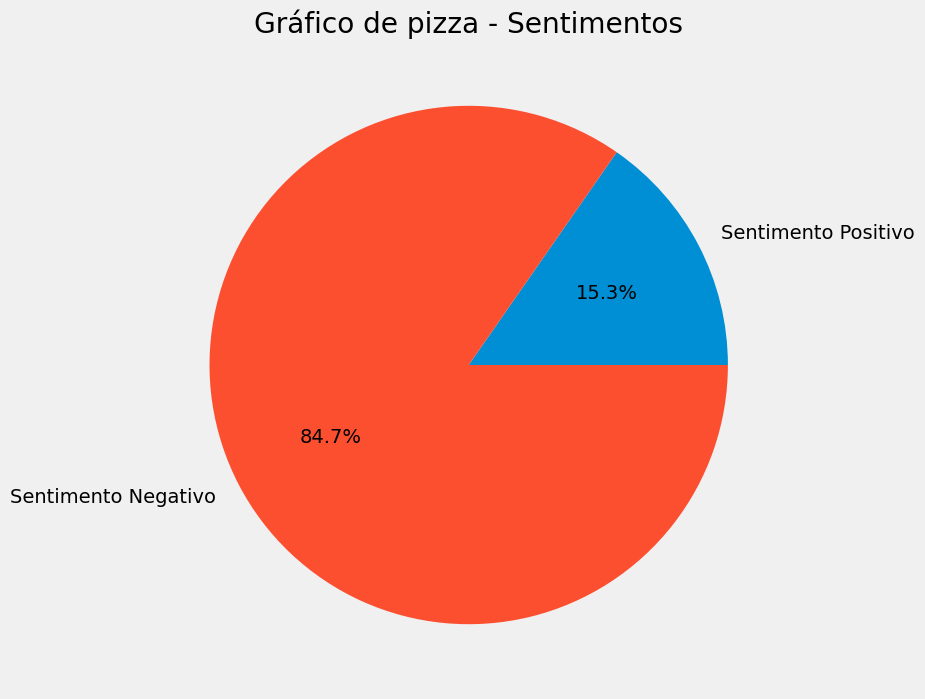

In [32]:
plt.figure(figsize=(15, 8))
plt.title("Gráfico de pizza - Sentimentos")

plt.pie(data.groupby('sentiment')['sentiment'].count(), 
        labels=['Sentimento Positivo','Sentimento Negativo'], 
        autopct='%1.1f%%');

<Axes: xlabel='Score', ylabel='sentiment'>

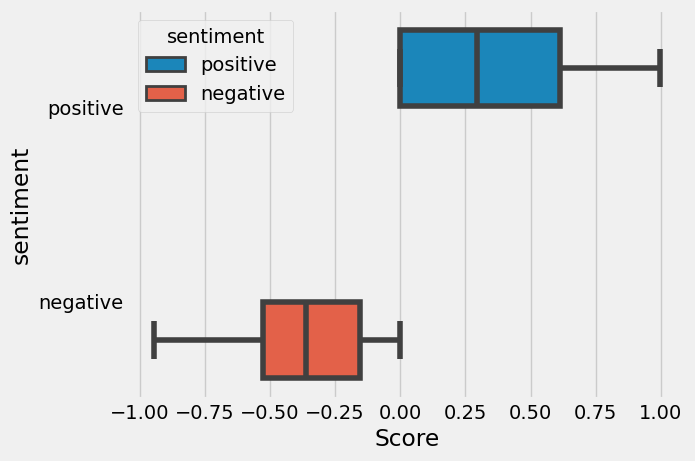

In [33]:
sns.boxplot(x="Score", y="sentiment", data = data, hue="sentiment")

<Axes: xlabel='Score', ylabel='Count'>

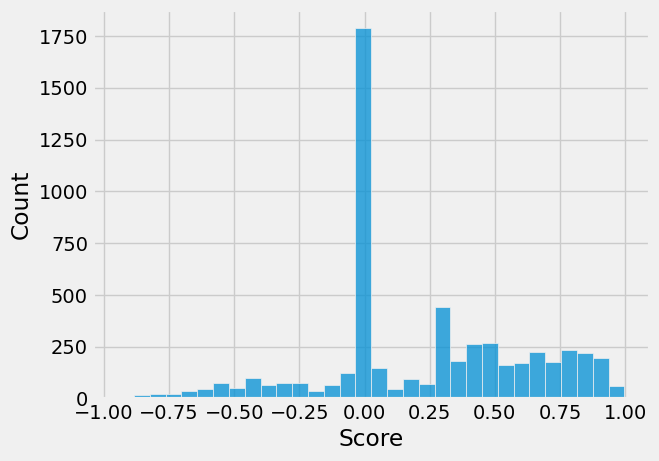

In [34]:
sns.histplot(data["Score"])

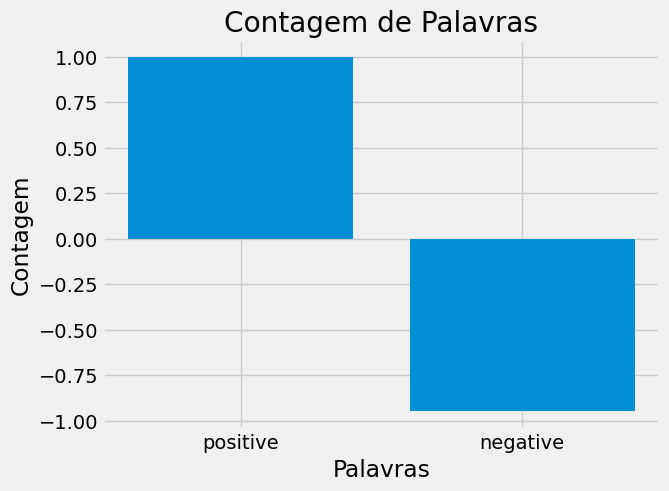

In [35]:
# Plotar o barplot
plt.bar(data.sentiment, data.Score)
plt.xlabel('Palavras')
plt.ylabel('Contagem')
plt.title('Contagem de Palavras')
plt.show()

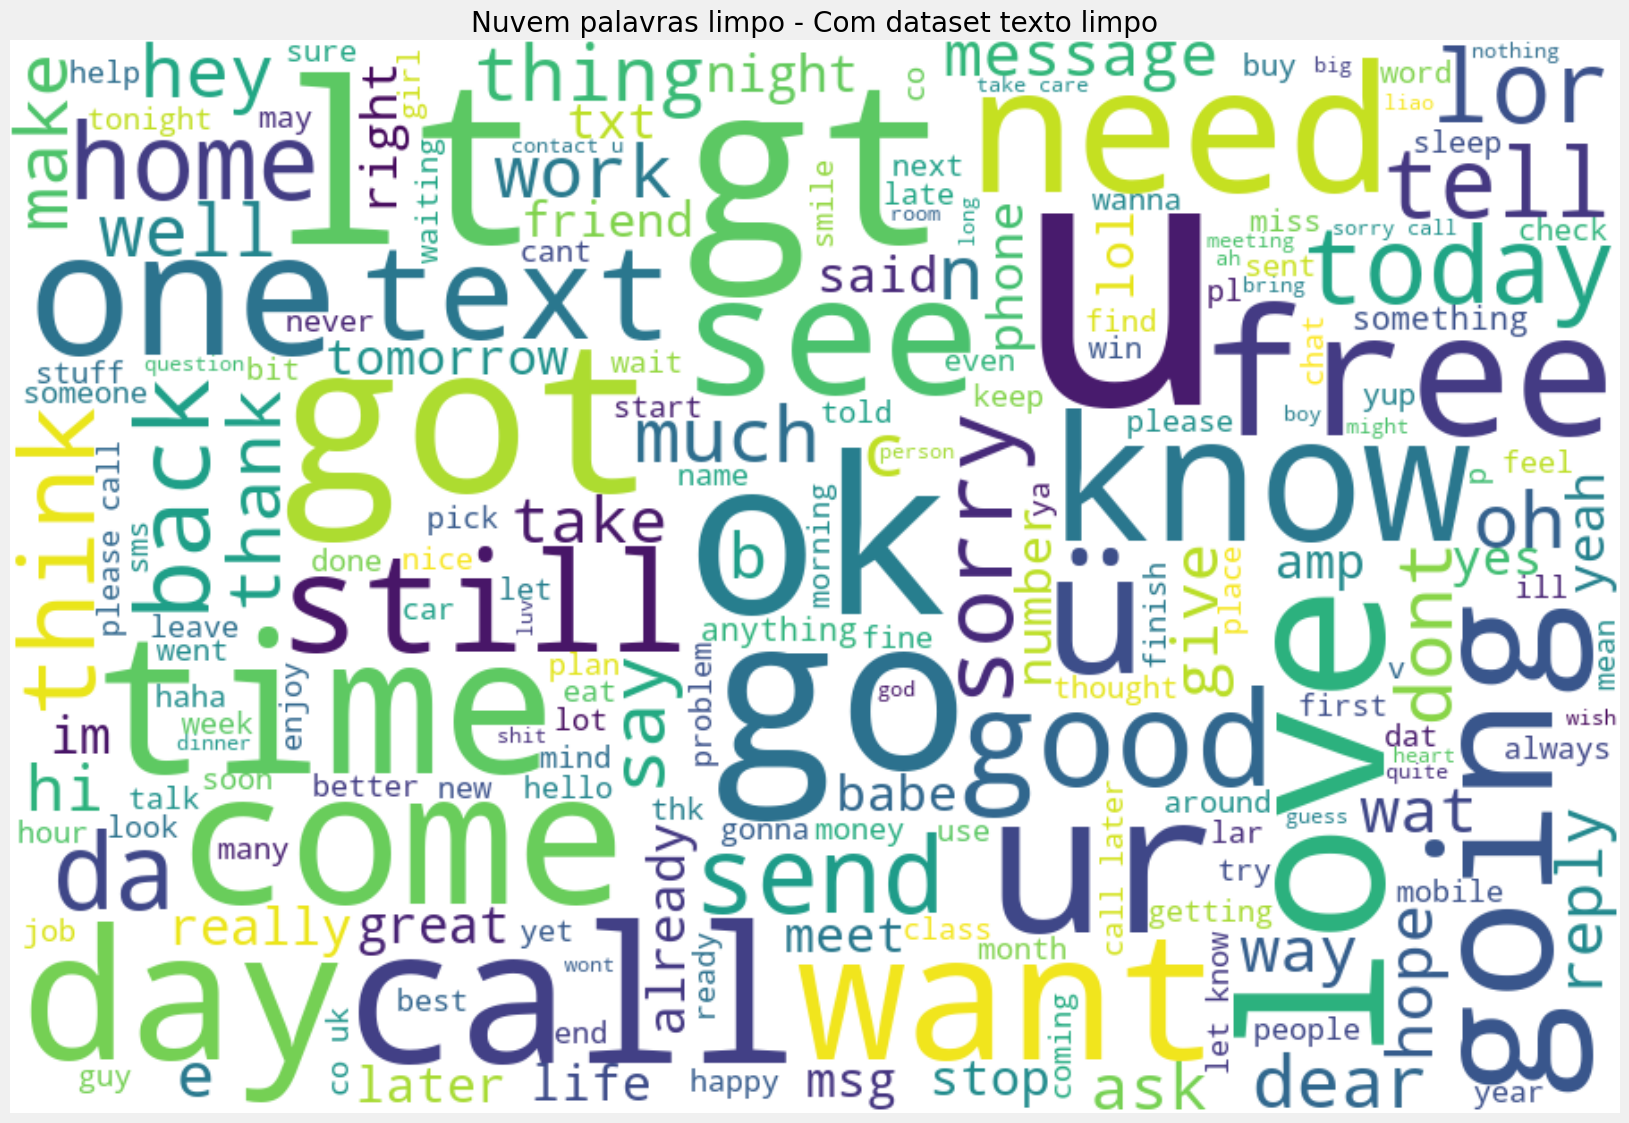

CPU times: total: 31.2 ms
Wall time: 1.22 s


In [36]:
%%time

# Gráfico de nuvem palavras mais faladas com dataset limpo
todos_palavras2 = ' '.join([message for message in data["Text_clean"]])
nuvem_palavras2 = WordCloud(width = 900, 
                           height = 600,
                           background_color="white",
                           collocations = True,
                           max_font_size = 200).generate(todos_palavras2)

plt.figure(figsize= (18.5, 25))
plt.title("Nuvem palavras limpo - Com dataset texto limpo")
plt.ylabel("Total")
plt.xlabel("Nuvem")
plt.imshow(nuvem_palavras2, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Text(0.5, 0, 'Ocorrências')

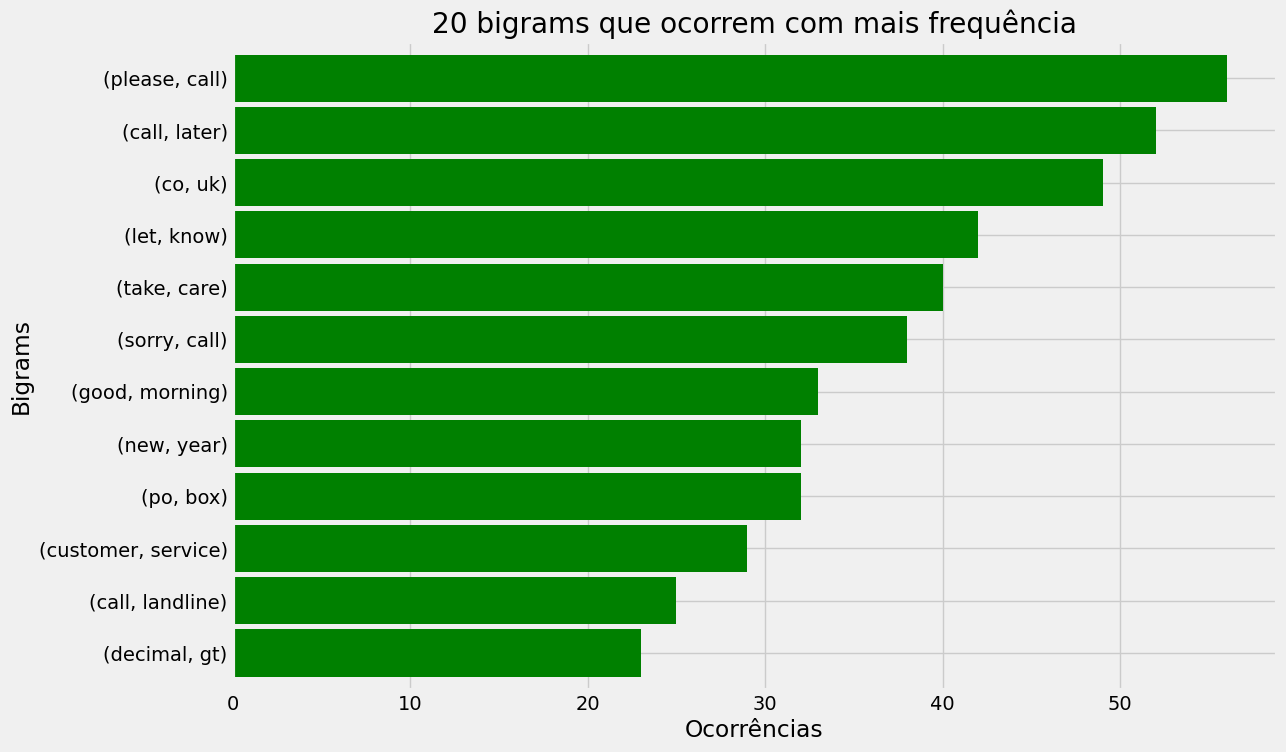

In [37]:
plt.figure(figsize=(20, 10))
bigrams.sort_values().plot.barh(color="green",
                                width = .9,
                                figsize = (12, 8))
plt.title("20 bigrams que ocorrem com mais frequência")
plt.ylabel("Bigrams")
plt.xlabel("Ocorrências")
#plt.savefig("plot_graf/Bigrams.png")

Text(0.5, 0, 'Ocorrências')

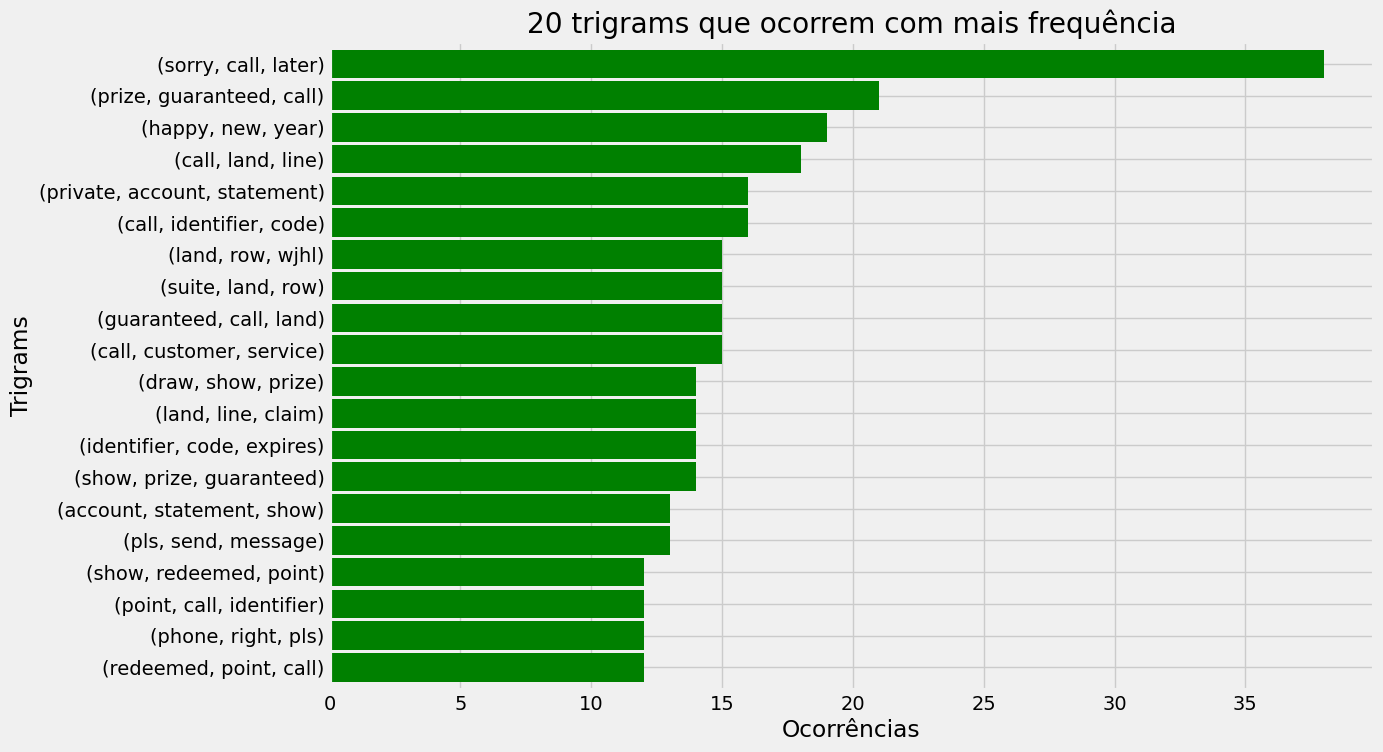

In [38]:
trigrams.sort_values().plot.barh(color='green', 
                                 width=.9, 
                                 figsize=(12, 8))
plt.title("20 trigrams que ocorrem com mais frequência")
plt.ylabel("Trigrams")
plt.xlabel("Ocorrências")
#plt.savefig("plot_graf/Trigrams.png")

# 6.0 Treino teste

**- Treino e teste da base de dados da colunas textos e sentimento**

Treino e teste são duas etapas fundamentais no desenvolvimento de modelos de aprendizado de máquina (machine learning) e em outras técnicas estatísticas. Essas etapas são usadas para avaliar a capacidade de generalização do modelo e medir seu desempenho em dados não vistos anteriormente.

A divisão entre treino e teste é necessária para evitar que o modelo memorize os dados de treinamento (overfitting) e não consiga generalizar bem para novos dados. Aqui está uma explicação detalhada sobre cada etapa:

A) Treinamento: Durante a etapa de treinamento, o modelo é alimentado com um conjunto de dados denominado conjunto de treinamento. Esse conjunto contém exemplos rotulados, onde as entradas (características) estão associadas a um rótulo conhecido (resultado esperado). O modelo usa esses exemplos para aprender os padrões e relações presentes nos dados e ajustar seus parâmetros internos.
O objetivo do treinamento é encontrar os melhores parâmetros do modelo que minimizem a diferença entre as previsões do modelo e os rótulos conhecidos. Isso é feito por meio de algoritmos de otimização que ajustam gradualmente os parâmetros com base nas diferenças (erros) entre as previsões e os rótulos conhecidos.

B) Teste: Após o treinamento, é necessário avaliar o desempenho do modelo em dados não vistos anteriormente. Para isso, utiliza-se um conjunto de dados separado chamado conjunto de teste. Esse conjunto também contém exemplos rotulados, mas o modelo não teve acesso a eles durante o treinamento.
O conjunto de teste é usado para fazer previsões com o modelo treinado e comparar essas previsões com os rótulos conhecidos. Isso permite medir a capacidade de generalização do modelo e avaliar seu desempenho em dados desconhecidos. Métricas como precisão, acurácia, recall e F1-score são comumente utilizadas para avaliar o desempenho do modelo durante a fase de teste.

É importante destacar que o conjunto de teste é usado apenas para avaliação final do modelo, não para ajustar seus parâmetros. A divisão entre conjunto de treinamento e conjunto de teste ajuda a estimar o desempenho esperado do modelo em situações reais, onde dados não rotulados estão disponíveis.

Além do treinamento e teste, é comum também utilizar uma terceira etapa chamada de validação. Nessa etapa, um conjunto de dados separado chamado conjunto de validação é utilizado para ajustar os hiperparâmetros do modelo, como taxa de aprendizado, número de camadas, tamanho do batch, etc. A validação auxilia na seleção dos melhores hiperparâmetros antes de finalizar o treinamento e avaliar o modelo no conjunto de teste.

A separação adequada entre treino, validação e teste é crucial para garantir uma avaliação justa e confiável do desempenho do modelo, além de evitar problemas de overfitting e subestimação de resultados.

In [39]:
# Variável para treino
x = data["Text_clean"]

# Variável para teste
y = data["Category"]

In [40]:
# Total de linhas e colunas dados variável x
x.shape

(5572,)

In [41]:
# Total de linhas e colunas dados variável y
y.shape

(5572,)

In [42]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [43]:
X_train.shape

(4457,)

In [44]:
y_train.shape

(4457,)

## 6.1 - Vetorização dados

Na área de aprendizado de máquina (machine learning), é comum que os algoritmos trabalhem com dados estruturados na forma de números. No entanto, ao lidar com texto, as palavras precisam ser transformadas em representações numéricas para serem utilizadas como entradas para os modelos de machine learning. Esse processo é conhecido como vetorização de dados.

A vetorização de dados é a etapa em que as palavras são transformadas em valores numéricos para que possam ser interpretadas pelos algoritmos de aprendizado de máquina. Existem várias técnicas de vetorização, e uma delas é a tokenização.

A tokenização é o processo de dividir o texto em unidades menores, chamadas tokens, que podem ser palavras individuais, frases ou até mesmo caracteres. Cada token é então codificado como um valor inteiro ou outro tipo de valor numérico, para que possa ser utilizado como entrada para o modelo de machine learning. 

Utilizamos a classe CountVectorizer do scikit-learn para realizar a vetorização. O texto é fornecido como uma lista de strings. O método fit_transform realiza a tokenização e vetorização, convertendo o texto em uma matriz de contagem de palavras. O método get_feature_names retorna o vocabulário, ou seja, as palavras únicas presentes no texto. O resultado é então exibido.

A vetorização de dados é uma etapa essencial no processamento de texto e análise de sentimentos. Ela permite que as palavras sejam representadas de forma numérica e sejam utilizadas como entrada para modelos de machine learning, possibilitando a extração de informações e insights a partir do texto. Dessa forma, os algoritmos podem aprender a reconhecer padrões e realizar tarefas como classificação de texto, análise de sentimento, entre outras."

In [45]:
%%time

# Importando biblioteca countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Criando uma instância com tweet
vectorizer = CountVectorizer()

X_train_vectorized = vectorizer.fit_transform(X_train)

X_test_vectorized = vectorizer.transform(X_test)

CPU times: total: 0 ns
Wall time: 54.2 ms


In [46]:
# Visualizando dados treino vetorizado
X_train_vectorized.shape

(4457, 6816)

In [47]:
# Visualizando dados teste vetorizado
X_test_vectorized.shape

(1115, 6816)

## 7.0 Bag of Words

"Bag of Words" (saco de palavras, em tradução livre) é uma técnica utilizada no processamento de linguagem natural (NLP) para representar o texto como uma coleção de palavras individuais, ignorando a estrutura gramatical e a ordem das palavras. Nessa abordagem, considera-se apenas a presença ou a contagem de palavras, sem levar em conta a sequência em que elas aparecem. A ideia por trás do "Bag of Words" é simplificar a representação do texto, transformando-o em um conjunto de palavras únicas e calculando sua frequência ou presença no documento. Para criar o "saco de palavras", o texto é dividido em tokens (geralmente palavras) e todas as palavras são armazenadas em um conjunto ou dicionário. Cada palavra no dicionário é atribuída a um índice único. Uma vez que o dicionário é criado, pode-se representar um documento por meio de um vetor numérico, chamado de vetor de características. Cada posição no vetor corresponde a uma palavra do dicionário e o valor naquela posição indica a frequência ou a presença da palavra no documento.

Por exemplo, considere as seguintes frases: "O gato preto é bonito" e "O cachorro marrom é fofo". Usando o "Bag of Words", o dicionário seria composto por palavras únicas: [o, gato, preto, é, bonito, cachorro, marrom, fofo]. As frases podem ser representadas pelos vetores de características: [2, 1, 1, 1, 1, 0, 0, 0] e [2, 0, 0, 1, 0, 1, 1, 1], respectivamente. Embora o "Bag of Words" seja uma técnica simples e eficiente para representar documentos em NLP, ela perde informações importantes, como a ordem das palavras e a semântica dos textos. No entanto, é amplamente utilizada em tarefas como classificação de texto, mineração de dados e análise de sentimentos, como um passo inicial para o processamento de textos mais avançado.

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_train)

In [49]:
vocabulary_1 = vectorizer.get_feature_names_out()
word_vectors = X.toarray()

In [50]:
print("Vocabulary:", vocabulary_1)
print("Word Vectors:", word_vectors)

Vocabulary: ['____' 'aah' 'aaniye' ... 'zouk' 'zyada' 'èn']
Word Vectors: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


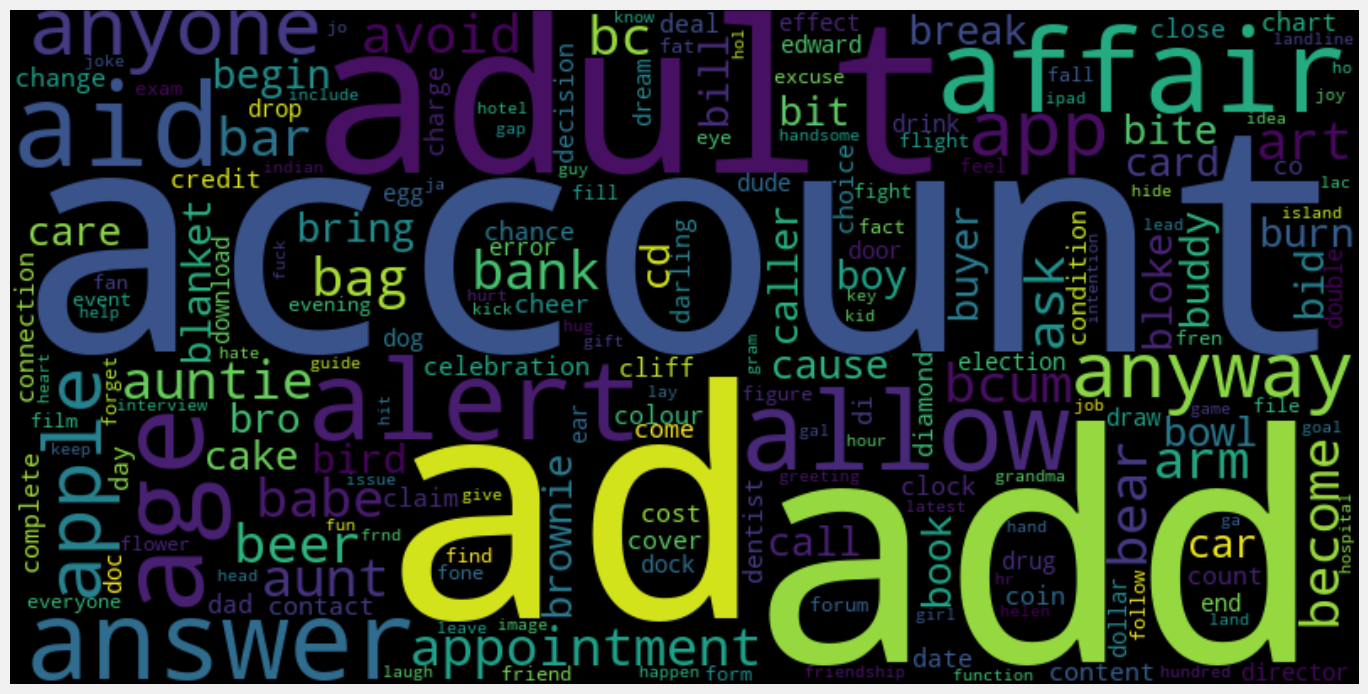

In [51]:
wordcloud = WordCloud(width=800, 
                      height=400,
                      background_color='black').generate(' '.join(vocabulary_1))

plt.figure(figsize=(15.5, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 8.0 Modelo machine learning

**Descrição**: Um modelo de machine learning é uma representação matemática ou estatística que é construída a partir de um algoritmo de aprendizado de máquina. Ele é utilizado para realizar tarefas específicas, como classificação, regressão, clustering, detecção de anomalias, entre outras, com base em dados de treinamento. Em machine learning, o objetivo é criar um modelo capaz de aprender padrões e fazer previsões ou tomar decisões com base nesses padrões. O modelo é construído por meio de um processo de treinamento, no qual são apresentados dados de entrada (conhecidos como conjunto de treinamento) juntamente com as respostas corretas ou alvos correspondentes. Durante o treinamento, o modelo ajusta seus parâmetros internos de acordo com os exemplos fornecidos. Esses parâmetros permitem que o modelo generalize o conhecimento adquirido durante o treinamento para realizar previsões ou tomar decisões em novos dados não vistos anteriormente. Após o treinamento, o modelo pode ser aplicado a novos dados para realizar previsões ou classificações. Ele utiliza os padrões aprendidos durante o treinamento para gerar resultados ou inferências com base nas características dos novos dados de entrada. Existem vários tipos de modelos de machine learning, incluindo modelos lineares, árvores de decisão, redes neurais, máquinas de vetores de suporte (SVM), modelos de Markov ocultos (HMM) e muitos outros. A escolha do modelo depende da natureza do problema, do tipo de dados disponíveis e dos objetivos específicos da tarefa de aprendizado de máquina. Os modelos de machine learning têm aplicações em uma ampla variedade de campos, como reconhecimento de fala, visão computacional, processamento de linguagem natural, recomendação de produtos, diagnóstico médico, detecção de fraudes, entre outros. Eles desempenham um papel fundamental no avanço da inteligência artificial e na automação de tarefas complexas.

**Modelo 1 - Regressão logistica**

**Descrição modelo regressão linear**: A regressão logística é um algoritmo de aprendizado de máquina supervisionado usado para realizar análise de classificação binária. Apesar do nome "regressão", a regressão logística é geralmente usada para problemas de classificação, onde o objetivo é prever a probabilidade de uma instância pertencer a uma das duas classes possíveis.

A regressão logística é adequada quando a variável dependente é binária (duas classes), como por exemplo, prever se um e-mail é spam ou não spam, se um paciente tem uma determinada doença ou não, se um cliente fará uma compra ou não, entre outros cenários.

O funcionamento da regressão logística é baseado em um modelo matemático que relaciona as variáveis independentes (características) a uma probabilidade estimada de pertencer a uma das classes. Essa probabilidade é calculada usando a função logística, também conhecida como função sigmoid:

**f(x) = 1 / (1 + e ^ (-x))**

Nesse contexto, a regressão logística estima os coeficientes (pesos) que multiplicam as características de entrada e as soma ponderadamente para calcular o valor do logito. O logito é então passado pela função sigmoid para obter uma probabilidade entre 0 e 1.

Durante o treinamento do modelo de regressão logística, os coeficientes são ajustados por meio de um processo iterativo, usando técnicas de otimização como a descida de gradiente (gradient descent), com o objetivo de minimizar a diferença entre as probabilidades previstas e os rótulos reais dos dados de treinamento.

Após o treinamento, o modelo de regressão logística é capaz de fazer previsões para novos exemplos, atribuindo uma probabilidade de pertencer a cada uma das classes. É comum usar um limiar (threshold) para tomar uma decisão final de classificação: se a probabilidade estimada for superior ao limiar, a instância é classificada como pertencente à classe positiva; caso contrário, é classificada como pertencente à classe negativa.

A regressão logística é amplamente utilizada em diferentes áreas, incluindo ciência de dados, medicina, marketing, finanças e muitas outras, devido à sua simplicidade, interpretabilidade e bom desempenho em problemas de classificação binária. Além disso, a regressão logística pode ser estendida para problemas de classificação multiclasse usando técnicas como a regressão logística multinomial ou a regressão logística ordinal.

In [52]:
%%time

# Modelo de regressão logistica 

# Importação da biblioteca
from sklearn.linear_model import LogisticRegression

# Nome do algoritmo M.L
model_logistic = LogisticRegression() 

# Treinamento do modelo
model_logistic_fit = model_logistic.fit(X_train_vectorized, y_train)

# Score do modelo dados treino x
model_logistic_score = model_logistic.score(X_train_vectorized, y_train)

# Score do modelo dados treino y
print("Model - Logistic Regression: %.2f" % (model_logistic_score * 100))

Model - Logistic Regression: 99.57
CPU times: total: 0 ns
Wall time: 92.9 ms


In [53]:
# Previsão modelo com função predict de previsão das frases

model_logistic_pred = model_logistic.predict(X_test_vectorized)
model_logistic_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [54]:
# Previsão modelo com função log_proba de probabilidades das frases

model_logistic_prob = model_logistic.predict_log_proba(X_test_vectorized)
model_logistic_prob

array([[-8.14489678e-03, -4.81443339e+00],
       [-9.32808002e-02, -2.41841885e+00],
       [-3.08717911e-03, -5.78204071e+00],
       ...,
       [-4.67744631e-03, -5.36734079e+00],
       [-7.90519958e-03, -4.84418456e+00],
       [-1.39190182e-02, -4.28145060e+00]])

## O que é Acúracia

A acurácia é uma métrica comumente usada para avaliar o desempenho de um modelo de aprendizado de máquina em problemas de classificação. Ela mede a proporção de instâncias classificadas corretamente em relação ao número total de instâncias no conjunto de dados. A fórmula básica para calcular a acurácia é:

**Acurácia = (Número de instâncias classificadas corretamente) / (Número total de instâncias)**

A acurácia é expressa como um valor entre 0 e 1, onde 1 representa uma acurácia perfeita, indicando que todas as instâncias foram classificadas corretamente, e 0 representa uma acurácia nula, indicando que nenhuma instância foi classificada corretamente.
A acurácia é uma métrica simples e fácil de entender, sendo amplamente utilizada como uma medida inicial do desempenho de um modelo. No entanto, ela pode não ser adequada para todos os problemas, especialmente quando os conjuntos de dados estão desequilibrados, ou seja, quando uma classe é muito mais frequente do que a outra. Nesses casos, outras métricas, como precisão, recall ou F1-score, podem fornecer uma visão mais completa e precisa do desempenho do modelo. É importante ressaltar que a acurácia por si só não é suficiente para avaliar completamente a qualidade de um modelo. Outras métricas e considerações, como matriz de confusão, curvas ROC (Receiver Operating Characteristic) e validação cruzada, devem ser levadas em conta para obter uma compreensão mais abrangente do desempenho do modelo em diferentes aspectos.

In [55]:
# Acúracia do modelo de Regressão logística
from sklearn import metrics
from sklearn.metrics import accuracy_score

accuracy_dt = accuracy_score(y_test, model_logistic_pred)
print("Acurácia - Regressão logística: %.2f" % (accuracy_dt * 100))

Acurácia - Regressão logística: 98.30


## Classification report

O classification report é um relatório que fornece uma visão detalhada das métricas de desempenho de um modelo de classificação. Ele é especialmente útil para problemas de classificação multiclasse, onde o modelo tem a tarefa de classificar instâncias em mais de duas classes. O classification report geralmente inclui as seguintes métricas para cada classe do problema de classificação:

1) Precision (precisão): A precisão é a proporção de instâncias classificadas corretamente para uma determinada classe em relação ao número total de instâncias classificadas como essa classe. Ela mede a qualidade das previsões positivas para a classe em questão.

2) Recall (revocação) ou Sensitivity (sensibilidade): O recall é a proporção de instâncias classificadas corretamente para uma determinada classe em relação ao número total de instâncias reais dessa classe. Ele mede a capacidade do modelo de identificar corretamente as instâncias positivas para a classe em questão.

3) F1-score: O F1-score é uma medida que combina precisão e recall em uma única métrica. É a média harmônica dessas duas métricas e fornece uma medida geral do desempenho do modelo para uma determinada classe.

4) Support (suporte): O suporte é o número total de instâncias reais para uma determinada classe no conjunto de dados. Ele fornece informações sobre a distribuição das instâncias nas diferentes classes.

Além dessas métricas para cada classe, o classification report geralmente inclui a média dessas métricas, considerando todas as classes, o que dá uma visão geral do desempenho global do modelo. Essas médias podem ser calculadas de várias formas, como a média aritmética simples (macro-average), a média ponderada pelo suporte de cada classe (weighted average) ou a média ponderada pela frequência real de cada classe (micro-average). O classification report é uma ferramenta útil para avaliar o desempenho do modelo de classificação, pois oferece uma visão detalhada das métricas para cada classe individualmente e para o conjunto de dados como um todo. Ele permite identificar classes com desempenho inferior, verificar o equilíbrio das métricas em diferentes classes e tomar decisões informadas sobre ajustes no modelo, como ações de ajuste de limiar ou ponderação de classes desequilibradas.

In [56]:
# Classification report
from sklearn.metrics import classification_report

classification = classification_report(model_logistic_pred, y_test)
print("Modelo - Regressão logística")
print()
print(classification)

Modelo - Regressão logística

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       985
        spam       0.87      1.00      0.93       130

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.99      0.98      0.98      1115



## O que é confusion matrix

Confusion matrix (matriz de confusão) é uma tabela que descreve o desempenho de um modelo de classificação, fornecendo uma visão detalhada das previsões feitas pelo modelo em comparação com as classes reais do conjunto de dados. A matriz de confusão tem dimensões KxK, onde K representa o número de classes no problema de classificação. Cada célula da matriz de confusão fornece informações sobre a contagem ou frequência das instâncias classificadas em uma classe verdadeira (linha) em relação à classe prevista (coluna). Aqui estão os elementos principais de uma matriz de confusão:

1) Verdadeiro Positivo (True Positive, TP): O número de instâncias que foram corretamente classificadas como positivas para a classe verdadeira.

2) Falso Positivo (False Positive, FP): O número de instâncias que foram incorretamente classificadas como positivas para a classe verdadeira. Também é conhecido como erro do Tipo I.

3) Verdadeiro Negativo (True Negative, TN): O número de instâncias que foram corretamente classificadas como negativas para a classe verdadeira.

4) Falso Negativo (False Negative, FN): O número de instâncias que foram incorretamente classificadas como negativas para a classe verdadeira. Também é conhecido como erro do Tipo II.

A matriz de confusão permite visualizar facilmente os erros de classificação feitos pelo modelo. Ela fornece uma visão geral dos resultados do modelo, destacando as áreas em que o modelo está acertando e errando em relação a cada classe. Com base na matriz de confusão, várias métricas de desempenho podem ser calculadas, incluindo precisão (precision), recall (revocação), F1-score e acurácia. Essas métricas podem ajudar a avaliar o desempenho global do modelo e entender sua capacidade de fazer previsões corretas para diferentes classes. 

A matriz de confusão é uma ferramenta importante para avaliar e diagnosticar o desempenho do modelo de classificação, especialmente em problemas multiclasse ou quando há desequilíbrio nas classes do conjunto de dados. Ela oferece informações mais detalhadas do que a acurácia sozinha, permitindo uma análise mais precisa das previsões do modelo e identificação de áreas para melhoria.

In [57]:
from sklearn.metrics import confusion_matrix

matrix_1 = confusion_matrix(model_logistic_pred, y_test)
matrix_1

print('Confusion matrix - Regressão logistica \n\n', matrix_1)
print('\nVerdadeiro Positivo(TP) = ', matrix_1[0,0])
print('\nVerdadeiro Negativo(TN) = ', matrix_1[1,1])
print('\nFalso Positivo(FP) = ', matrix_1[0,1])
print('\nFalso Negativo(FN) = ', matrix_1[1,0])

Confusion matrix - Regressão logistica 

 [[966  19]
 [  0 130]]

Verdadeiro Positivo(TP) =  966

Verdadeiro Negativo(TN) =  130

Falso Positivo(FP) =  19

Falso Negativo(FN) =  0


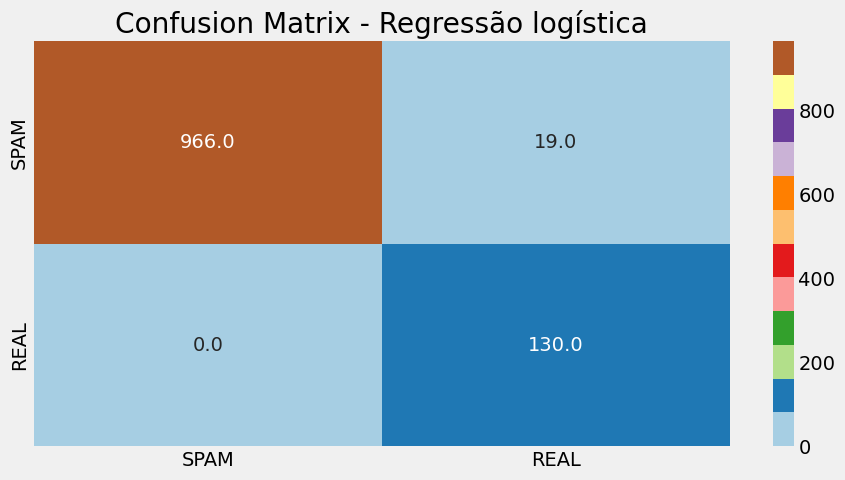

In [58]:
# Plot matriz de confusão
plt.figure(figsize=(10, 5))

ax = plt.subplot()
sns.heatmap(matrix_1, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - Regressão logística'); 
ax.xaxis.set_ticklabels(["SPAM", "REAL"]); ax.yaxis.set_ticklabels(["SPAM", "REAL"]);

**Modelo 02 - Naive bayes**

Naive Bayes é um algoritmo de aprendizado de máquina baseado no teorema de Bayes e é amplamente utilizado em problemas de classificação. O algoritmo Naive Bayes é considerado "ingênuo" (naive) porque assume uma independência entre as características (variáveis preditoras) do conjunto de dados, o que pode não ser realista em muitos casos.

O teorema de Bayes é uma teoria estatística que descreve a probabilidade condicional de um evento A ocorrer, dado que o evento B já ocorreu. O algoritmo Naive Bayes utiliza esse teorema para calcular a probabilidade de uma instância pertencer a uma determinada classe, com base nas características observadas dessa instância.

A suposição de independência entre as características é a principal simplificação do algoritmo Naive Bayes. Isso significa que o algoritmo considera que as características são independentes entre si, ou seja, a presença ou valor de uma característica não é influenciado pelas outras características. Essa suposição simplificadora pode não ser válida em todos os casos, mas mesmo assim, o Naive Bayes tem sido amplamente utilizado e mostra bom desempenho em muitas situações.

O Naive Bayes usa o teorema de Bayes para calcular a probabilidade posterior de cada classe dado um conjunto de características observadas. A fórmula básica do teorema de Bayes é a seguinte:

**P(classe | características) = (P(características | classe) * P(classe)) / P(características)**

Nessa fórmula, P(classe | características) é a probabilidade posterior da classe, P(características | classe) é a probabilidade de observar as características dadas a classe, P(classe) é a probabilidade a priori da classe (baseada na frequência de cada classe no conjunto de treinamento) e P(características) é a probabilidade das características observadas (constante para todas as classes).

O algoritmo Naive Bayes estima essas probabilidades a partir dos dados de treinamento e usa-as para fazer previsões para novas instâncias. As características podem ser categóricas ou contínuas, e diferentes variantes do Naive Bayes (como Naive Bayes Gaussiano, Naive Bayes Multinomial, Naive Bayes Bernoulli) são usadas para diferentes tipos de dados.

O Naive Bayes é amplamente aplicado em problemas de classificação, como filtragem de spam, categorização de documentos, diagnóstico médico, detecção de fraudes, entre outros. Ele é conhecido por sua simplicidade, eficiência computacional e bom desempenho em conjuntos de dados de grande escala, embora possa não ser adequado para problemas com dependências complexas entre as características.

In [59]:
%%time

# Modelo machine learning - Naive bayes

# Importação da biblioteca
from sklearn.naive_bayes import MultinomialNB

# Nome do algoritmo M.L
model_naive_bayes = MultinomialNB()

# Treinamento do modelo
model_naive_bayes_fit = model_naive_bayes.fit(X_train_vectorized, y_train)

# Score do modelo dados treino x
model_naive_bayes_scor = model_naive_bayes.score(X_train_vectorized, y_train)

 # Score do modelo dados treino y
print("Model - Naive Bayes: %.2f" % (model_naive_bayes_scor * 100))

Model - Naive Bayes: 99.24
CPU times: total: 0 ns
Wall time: 18 ms


In [60]:
# Previsão modelo com função predict de previsã das frases

model_naive_bayes_pred = model_naive_bayes.predict(X_test_vectorized)
model_naive_bayes_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [61]:
# Previsão modelo com função log_proba de probabilidades das frases

model_naive_bayes_prob = model_naive_bayes.predict_proba(X_test_vectorized).round(2)
print(model_naive_bayes_prob)

[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.87 0.13]]


In [62]:
# Acúracia do modelo de Naive bayes
accuracy_naive_bayes = metrics.accuracy_score(y_test, model_naive_bayes_pred)
print("Accuracy model Naive bayes: %.2f" % (accuracy_naive_bayes * 100))

Accuracy model Naive bayes: 98.30


In [63]:
# Classification report
classification = classification_report(model_naive_bayes_pred, y_test)
print("Modelo - Naive bayes")
print()
print(classification)

Modelo - Naive bayes

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       967
        spam       0.93      0.94      0.94       148

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [64]:
# Confusion matrix
matrix_2 = confusion_matrix(model_naive_bayes_pred, y_test)

print('Confusion matrix - Naive bayes \n\n', matrix_2)
print('\nVerdadeiro Positivo(TP) = ', matrix_2[0,0])
print('\nVerdadeiro Negativo(TN) = ', matrix_2[1,1])
print('\nFalso Positivo(FP) = ', matrix_2[0,1])
print('\nFalso Negativo(FN) = ', matrix_2[1,0])

Confusion matrix - Naive bayes 

 [[957  10]
 [  9 139]]

Verdadeiro Positivo(TP) =  957

Verdadeiro Negativo(TN) =  139

Falso Positivo(FP) =  10

Falso Negativo(FN) =  9


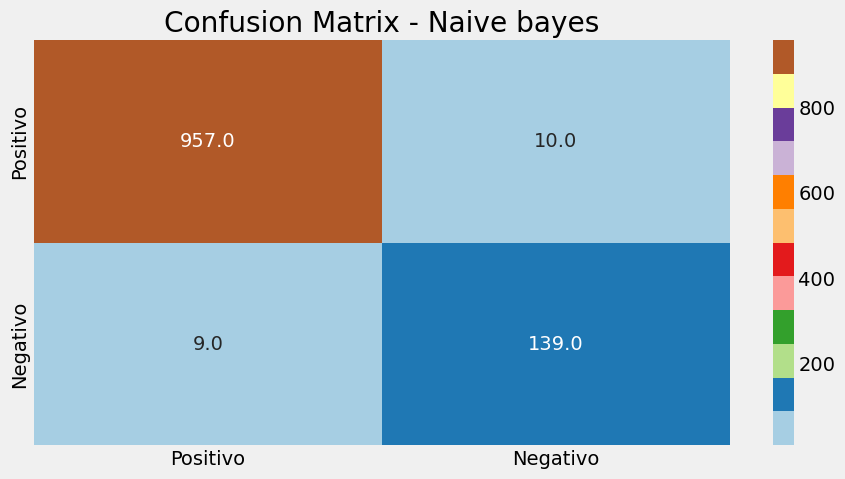

In [65]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))

ax = plt.subplot()
sns.heatmap(matrix_2, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - Naive bayes'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo"]); ax.yaxis.set_ticklabels(["Positivo", "Negativo"]);

# Salvando modelo 

In [70]:
import pickle

# Salvar o modelo em um arquivo .pkl
with open('modelo_naive_bayes2.pkl', 'wb') as file:
    pickle.dump(model_naive_bayes, file)
    
# Salvar o modelo em um arquivo .pkl
with open('model_logistic.pkl', 'wb') as file:
    pickle.dump(model_logistic, file)